Lefki Ioanna (Eleanna) Panagiotou 

ID: 908 589 7206

In [139]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import  auc

from tqdm.auto import tqdm

## Question 1.5.a

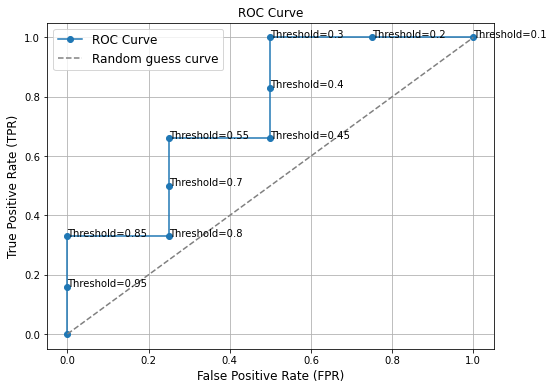

In [140]:
fpr = [0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.75, 1.0]  
tpr = [0.0, 0.16, 0.33, 0.33, 0.5, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0]  


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=12)
plt.grid(True)


thresholds = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
for i in range(len(thresholds)):
    plt.annotate(f'Threshold={thresholds[i]}', (fpr[i+1], tpr[i+1]))


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess curve')

plt.legend(fontsize=12)
plt.show()

## Question 2.1

In [141]:
# Load data
def load_data(filename):
    
    data = os.path.join(filename)
    data = np.loadtxt(data)

    X = data[:,:-1]
    y = data[:,-1]
    
    return X,y

In [142]:
def my_KNN(X_train, y_train, X_test, K):
    
    y_test = np.zeros([X_test.shape[0]])
    
    for i in range(0, X_test.shape[0]):
        
        distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
        nearest_indices = np.argsort(distances, kind='stable')[:K]
        y_test[i] = np.bincount((y_train[nearest_indices]).astype(int)).argmax()
    
    return y_test

In [143]:
X_train, y_train = load_data("D2z.txt")

In [144]:
x_1 = np.arange(-2.0,2.1,0.1)
x_1[20]=0
x_2 = np.arange(-2.0,2.1,0.1)
x_2[20] = 0

x_1, x_2 = np.meshgrid(x_1, x_2)

X_test = np.column_stack((x_1.ravel(), x_2.ravel()))

In [145]:
y_test = my_KNN(X_train, y_train, X_test, 1)

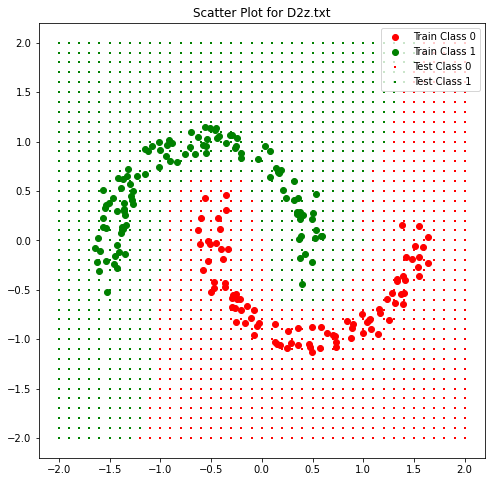

In [146]:
plt.figure(figsize=(8, 8)) 

plt.scatter(X_train[np.where(y_train<1)[0],0], X_train[np.where(y_train<1)[0],1], c='r', label='Train Class 0', marker='o')
plt.scatter(X_train[np.where(y_train>0)[0],0], X_train[np.where(y_train>0)[0],1], c='g', label='Train Class 1', marker='o')

plt.scatter(X_test[np.where(y_test<1)[0],0], X_test[np.where(y_test<1)[0],1], c='r', label='Test Class 0', marker='+', s=4)
plt.scatter(X_test[np.where(y_test>0)[0],0], X_test[np.where(y_test>0)[0],1], c='g', label='Test Class 1', marker='+', s=4)

plt.title('Scatter Plot for D2z.txt')
plt.legend(loc='upper right')

plt.show()

## Question 2.2

In [147]:
df = pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Email 4996,20,6,3,1,1,1,34,0,0,...,0,0,0,0,0,0,0,1,0,0
4996,Email 4997,0,7,1,0,0,0,20,1,1,...,0,0,0,1,0,0,0,0,0,0
4997,Email 4998,6,8,1,3,2,1,64,7,1,...,0,0,0,0,0,0,0,0,0,0
4998,Email 4999,8,6,2,5,6,1,51,4,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X = df.loc[:,'the':'dry']
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20,6,3,1,1,1,34,0,0,15,...,0,0,0,0,0,0,0,0,1,0
4996,0,7,1,0,0,0,20,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4997,6,8,1,3,2,1,64,7,1,16,...,0,0,0,0,0,0,0,0,0,0
4998,8,6,2,5,6,1,51,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [149]:
y = df.loc[:,'Prediction']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Prediction, Length: 5000, dtype: int64

In [150]:
step = 1000
fold_count = 0
for i in range(0,5000,step):
    
    fold_count += 1
    
    if i!=0:
        X_test = (X.loc[i-1:i+step-1]).to_numpy()
        y_test = (y.loc[i-1:i+step-1]).to_numpy()
        X_train = (X.drop(X.index[i-1:i+step])).to_numpy()
        y_train = (y.drop(y.index[i-1:i+step])).to_numpy()
    else:
        X_test = (X.loc[i:i+step-1]).to_numpy()
        y_test = (y.loc[i:i+step-1]).to_numpy()
        X_train = (X.drop(X.index[i:i+step])).to_numpy()
        y_train = (y.drop(y.index[i:i+step])).to_numpy()
        
    y_pred = my_KNN(X_train, y_train, X_test, 1)
    
    
    TP = sum((i == 1) and (j == 1) for i, j in zip(y_test, y_pred))
    TN = sum((i == 0) and (j == 0) for i, j in zip(y_test, y_pred))
    FP = sum((i == 0) and (j == 1) for i, j in zip(y_test, y_pred))
    FN = sum((i == 1) and (j == 0) for i, j in zip(y_test, y_pred))

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    print(f"Fold {fold_count}: accuracy = {round(accuracy, 4)}, precision = {round(precision, 4)}, recall = {round(recall, 4)}")

Fold 1: accuracy = 0.825, precision = 0.6545, recall = 0.8175
Fold 2: accuracy = 0.8521, precision = 0.6838, recall = 0.8664
Fold 3: accuracy = 0.8611, precision = 0.7212, recall = 0.8351
Fold 4: accuracy = 0.8511, precision = 0.7164, recall = 0.8163
Fold 5: accuracy = 0.7752, precision = 0.6057, recall = 0.7582


## Q2.3

In [151]:
def logistic_regr_train(X_train, y_train, lr, epochs):
    
    X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    
    theta = np.zeros((1, X_train.shape[1] + 1))  
    
    for _ in range(epochs):
        temp = np.dot(theta, X_train_with_bias.T)
        y_pred = 1 / (1 + np.exp(-temp))
        grad = np.dot((y_pred - y_train), X_train_with_bias)
        theta = theta - lr * grad / X_train.shape[0]  
    
    return theta

def logistic_regr_predict(X_test, theta):
    
    X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    
    temp = np.dot(theta, X_test_with_bias.T)
    y_pred = 1 / (1 + np.exp(-temp))
    
    return y_pred


In [152]:
step = 1000
fold_count = 0
lr = 1e-3
epochs = 5000

for i in tqdm(range(0,5000,step)):
    
    fold_count += 1
    
    if i!=0:
        X_test = (X.loc[i-1:i+step-1]).to_numpy()
        y_test = (y.loc[i-1:i+step-1]).to_numpy()
        X_train = (X.drop(X.index[i-1:i+step])).to_numpy()
        y_train = (y.drop(y.index[i-1:i+step])).to_numpy()
    else:
        X_test = (X.loc[i:i+step-1]).to_numpy()
        y_test = (y.loc[i:i+step-1]).to_numpy()
        X_train = (X.drop(X.index[i:i+step])).to_numpy()
        y_train = (y.drop(y.index[i:i+step])).to_numpy()
    
    theta = logistic_regr_train(X_train, y_train, lr, epochs)
    y_pred = np.round(logistic_regr_predict(X_test, theta).reshape(X_test.shape[0])).astype(int)
    
    TP = sum((i == 1) and (j == 1) for i, j in zip(y_test, y_pred))
    TN = sum((i == 0) and (j == 0) for i, j in zip(y_test, y_pred))
    FP = sum((i == 0) and (j == 1) for i, j in zip(y_test, y_pred))
    FN = sum((i == 1) and (j == 0) for i, j in zip(y_test, y_pred))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    print(f"Fold {fold_count}: accuracy = {round(accuracy, 4)}, precision = {round(precision, 4)}, recall = {round(recall, 4)}")

  0%|          | 0/5 [00:00<?, ?it/s]

Fold 1: accuracy = 0.934, precision = 0.9228, recall = 0.8386
Fold 2: accuracy = 0.9351, precision = 0.9046, recall = 0.8556
Fold 3: accuracy = 0.9191, precision = 0.925, recall = 0.7789
Fold 4: accuracy = 0.9171, precision = 0.8981, recall = 0.8095
Fold 5: accuracy = 0.9051, precision = 0.8754, recall = 0.8039


## Q2.4

In [80]:
step = 1000
count = 0
avg_accuracies = []

for k in [1,3,5,7,10]:
    
    count += 1
    accuracies = []
    
    for i in tqdm(range(0,5000,step)):

        if i!=0:
            X_test = (X.loc[i-1:i+step-1]).to_numpy()
            y_test = (y.loc[i-1:i+step-1]).to_numpy()
            X_train = (X.drop(X.index[i-1:i+step])).to_numpy()
            y_train = (y.drop(y.index[i-1:i+step])).to_numpy()
        else:
            X_test = (X.loc[i:i+step-1]).to_numpy()
            y_test = (y.loc[i:i+step-1]).to_numpy()
            X_train = (X.drop(X.index[i:i+step])).to_numpy()
            y_train = (y.drop(y.index[i:i+step])).to_numpy()
        
        y_pred = my_KNN(X_train, y_train, X_test, k)

        TP = sum((i == 1) and (j == 1) for i, j in zip(y_test, y_pred))
        TN = sum((i == 0) and (j == 0) for i, j in zip(y_test, y_pred))
        FP = sum((i == 0) and (j == 1) for i, j in zip(y_test, y_pred))
        FN = sum((i == 1) and (j == 0) for i, j in zip(y_test, y_pred))

        accuracy = (TP + TN) / (TP + TN + FP + FN)
        accuracies.append(accuracy)
        
    avg_accuracies.append(sum(accuracies)/len(accuracies))
    print(f"K {k}: , average accuracy: {round(avg_accuracies[count-1], 4)}")

  0%|          | 0/5 [00:00<?, ?it/s]

K 1: , average accuracy: 0.8329


  0%|          | 0/5 [00:00<?, ?it/s]

K 3: , average accuracy: 0.8419


  0%|          | 0/5 [00:00<?, ?it/s]

K 5: , average accuracy: 0.8413


  0%|          | 0/5 [00:00<?, ?it/s]

K 7: , average accuracy: 0.8451


  0%|          | 0/5 [00:00<?, ?it/s]

K 10: , average accuracy: 0.8551


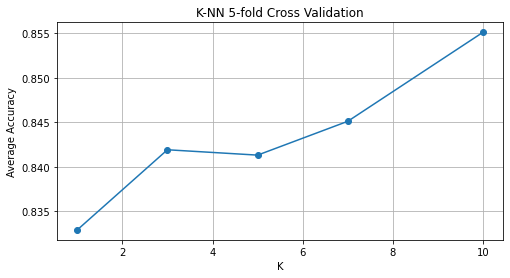

In [153]:
plt.figure(figsize=(8, 4)) 
plt.plot( [1,3,5,7,10], avg_accuracies, marker='o', linestyle='-')  
# plt.plot( [3,5], avg_accuracies, marker='o', linestyle='-')  

plt.ylabel('Average Accuracy')
plt.xlabel('K')
plt.title('K-NN 5-fold Cross Validation')

plt.grid(True)
plt.show()

## Q2.5

In [159]:
X_train = (X.loc[0:3999]).to_numpy()
y_train = (y.loc[0:3999]).to_numpy()
X_test = (X.loc[4000:4999]).to_numpy()
y_test = (y.loc[4000:4999]).to_numpy()

In [160]:
def my_KNN2(X_train, y_train, X_test, K):

    y_test = np.zeros([X_test.shape[0]])

    for i in range(0, X_test.shape[0]):

        distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
        nearest_indices = np.argsort(distances, kind='stable')[:K]

        class_counts = list(np.bincount((y_train[nearest_indices])))

        if (len(class_counts) == 1):
            class_counts.append(0)
        y_test[i] = class_counts[1]/(class_counts[0] + class_counts[1])
        
    return y_test

In [161]:
thresholds = np.linspace(0, 1, 200)

y_pred = my_KNN2(X_train, y_train, X_test, 5)

knn_fpr = []
knn_tpr = []

for threshold in thresholds:
    y_pred_new = np.where(y_pred>threshold, 1,0)
    
    TP = sum((i == 1) and (j == 1) for i, j in zip(y_test, y_pred_new))
    TN = sum((i == 0) and (j == 0) for i, j in zip(y_test, y_pred_new))
    FP = sum((i == 0) and (j == 1) for i, j in zip(y_test, y_pred_new))
    FN = sum((i == 1) and (j == 0) for i, j in zip(y_test, y_pred_new))

    knn_fpr.append(FP / (FP + TN))
    knn_tpr.append(TP / (TP + FN))

knn_auc = round(auc(knn_fpr, knn_tpr), 3)

In [130]:
lr = 1e-3
epochs = 5000
thresholds = np.linspace(0, 1, 200)

theta = logistic_regr_train(X_train, y_train, lr, epochs)
y_pred = logistic_regr_predict(X_test, theta).reshape(X_test.shape[0])

lg_fpr = []
lg_tpr = []
for threshold in thresholds:
    y_pred_new = np.where(y_pred>threshold, 1,0)
    
    TP = sum((i == 1) and (j == 1) for i, j in zip(y_test, y_pred_new))
    TN = sum((i == 0) and (j == 0) for i, j in zip(y_test, y_pred_new))
    FP = sum((i == 0) and (j == 1) for i, j in zip(y_test, y_pred_new))
    FN = sum((i == 1) and (j == 0) for i, j in zip(y_test, y_pred_new))

    lg_fpr.append(FP / (FP + TN))
    lg_tpr.append(TP / (TP + FN))


lg_auc = round(auc(lg_fpr, lg_tpr), 3)

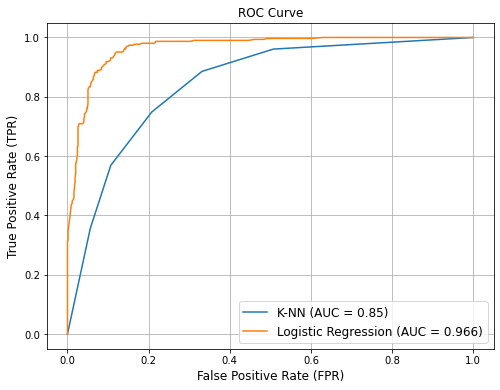

In [164]:
plt.figure(figsize=(8, 6))

plt.plot([1] + knn_fpr + [0], [1] + knn_tpr + [0], linestyle='-', label='K-NN (AUC = ' + str(knn_auc) +')')
plt.plot([1] + lg_fpr + [0], [1] + lg_tpr + [0], linestyle='-', label='Logistic Regression (AUC = ' + str(lg_auc) +')')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve', fontsize=12)
plt.grid(True)

plt.legend(fontsize=12)
plt.show()